# CA684 Assignment

# Data Loading

In [5]:
import time
import re
import random as rd 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import urllib
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('german')
from nltk.stem import PorterStemmer
from string_grouper import match_strings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91993\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
offers_test_df=pd.read_parquet('C:\\Users\\91993\\Desktop\\MCM Sem 2\\CA684 - Machine Learning\\assignment\\assignment\\offers_test.parquet')

# Data Exploration

In [7]:
offers_test_df.head()

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,67069c3c-46a7-45ea-ae0f-1cac2571ae68,aboutyou,de,DKNY,beige | Beige,Schal,"{""Marke"": [""DKNY""], ""Gr\u00f6\u00dfenlauf"": [""...",49.990000,https://www.aboutyou.de/p/dkny/schal-7221536,[https://cdn.aboutstatic.com/file/images/d8432...
1,c065bcd3-0669-4061-b1ce-fd6467f81b91,aboutyou,de,MICHAEL Michael Kors,schwarz | Mischfarben,Plisseerock,"{""Marke"": [""MICHAEL Michael Kors""], ""Gr\u00f6\...",79.980000,https://www.aboutyou.de/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/687cd...
2,7dfb8ecf-ba37-42dc-9287-78bac2b0e192,aboutyou,de,MICHAEL Michael Kors,hellbraun | mokka | Braun,Tasche,"{""Zielgruppe"": [""Female""], ""Gr\u00f6\u00dfe (V...",349.000000,https://www.aboutyou.at/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/56cd9...
3,5f42a01e-32e0-4e96-9434-4c2faf4346d1,aboutyou,de,Ragwear,blau | Blau,Winterjacke 'Ashani Puffy',"{""Marke"": [""Ragwear""], ""Zielgruppe"": [""Frauen""...",175.000000,https://www.aboutyou.at/p/ragwear/winterjacke-...,[https://cdn.aboutstatic.com/file/images/56fe6...
4,649b7eeb-30be-4bee-9b45-b01f378ba11a,zalando,de,Samsøe Samsøe,dunkelblau,AVERIE Shorts Stoffhose,main_supplier_code K71977 $ name_suffix sky ca...,129.685455,https://www.zalando.de/lookup/article/SA321S00...,[https://img01.ztat.net/article/93b0febd02a34b...


In [8]:
#Displaying the length of the dataset
len(offers_test_df)

106741

In [9]:
#Finding the count of each shop in the data
count = offers_test_df.groupby('shop')['shop'].count()
count

shop
aboutyou    70105
zalando     36636
Name: shop, dtype: int64

In [10]:
#Checking for null values in all the columns
offers_test_df.isnull().sum()

offer_id        0
shop            0
lang            0
brand           0
color          15
title           0
description     0
price           1
url             0
image_urls     57
dtype: int64

In [11]:
#Renaming the column headers
headers = ['offerid','shop','lang','brand','color','title','desc','price','url','imgrl']
offers_test_df.columns=headers

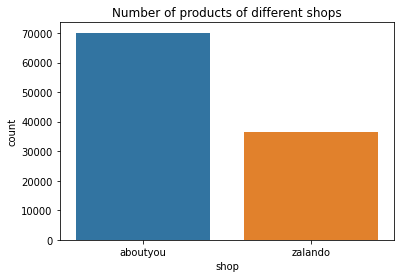

In [12]:
#Plotting the number of products in different shops
plt.title('Number of products of different shops')
ax=sns.countplot(x="shop",data=offers_test_df)

<AxesSubplot:ylabel='shop'>

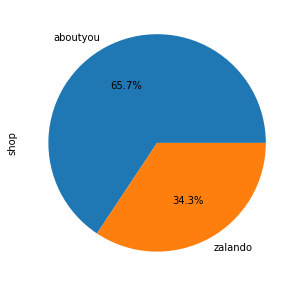

In [13]:
#Pie chart for the distribution of shops in the test data
figure, ax = plt.subplots(figsize=(15, 5))
count.plot.pie(autopct="%.1f%%")

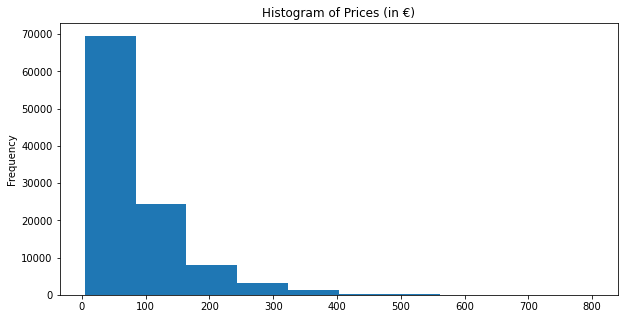

In [14]:
#Histogram of the price ranges
figure, ax = plt.subplots(figsize=(10, 5))
plt.title('Histogram of Prices (in €)')
offers_test_df[offers_test_df['price'] < 800]['price'].plot.hist(bins=10)
plt.show()

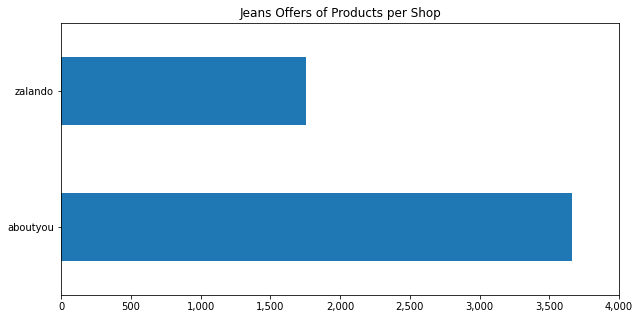

In [15]:
#Graphing number of Jeans in different shops
figure, ax = plt.subplots(figsize=(10, 5))
plt.title('Jeans Offers of Products per Shop')
pd.value_counts(offers_test_df[offers_test_df['title'].str.lower().str.contains("jeans")]['shop']).plot.barh()
xlabels = [f'{x:,}' for x in range(0, 4500, 500)]
plt.xticks(range(0, 4500, 500), xlabels)
plt.show()

In [16]:
#Number of unique titles
title_test=offers_test_df['title'].unique()
len(title_test)

35577

In [17]:
#Number of unique brands
brand_test=offers_test_df['brand'].unique()
len(brand_test)

164

In [18]:
#Number of unique colors
color_test=offers_test_df['color'].unique()
len(color_test)

12813

# Text Pre-Processing

In [19]:
#Lowercasing titles
offers_test_df['title'] = offers_test_df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
offers_test_df['title'].head()
#Removing punctuations from titles
offers_test_df['title'] = offers_test_df['title'].str.replace('[^\w\s]','')
offers_test_df['title'].head()
#Removing stop-words from titles
offers_test_df['title']= offers_test_df['title'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
offers_test_df['title'] = offers_test_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#offers_test_df['title'].head()
#Stemming the titles
st = PorterStemmer()
offers_test_df['title'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

C:\Users\91993\AppData\Local\Temp/ipykernel_16772/2447448134.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  offers_test_df['title'] = offers_test_df['title'].str.replace('[^\w\s]','')


0                      schal
1                plisseerock
2                      tasch
3    winterjack ashani puffi
4       averi short stoffhos
Name: title, dtype: object

In [20]:
#Divided the dataset into two sub datasets, one of all zalando products and the other of all aboutyou products
grouped = offers_test_df.groupby(offers_test_df.shop)
zalando_test = grouped.get_group("zalando")
aboutyou_test = grouped.get_group("aboutyou")

# Generating Matches

In [21]:
#Generating matches between the two datasets
matches = match_strings(zalando_test['title'], aboutyou_test['title'], ignore_index=True)
#Removing all exact matches
matches_df = matches[matches['similarity']<0.99]
matches_df=matches_df.drop_duplicates()
#Resetting the indices
matches_df=matches_df.reset_index(drop=True)
#Removing all self-matches
i=0
for i in range(len(matches_df)):
        if (offers_test_df[offers_test_df['title']==matches_df.loc[i][0]].iloc[0][1])==(offers_test_df[offers_test_df['title']==matches_df.loc[i][2]].iloc[0][1]):
            matches_df.drop(i, inplace=True)

In [22]:
(matches_df.shape)

(451, 3)

In [23]:
#Generating Offer_ids from the matches
matches_df=matches_df.reset_index(drop=True)
z_offer_id=[]
ay_offer_id=[]
i=0
for i in range(len(matches_df)):
    temp=offers_test_df[offers_test_df['title']==matches_df.loc[i][0]].iloc[0][1]
    if(temp=='zalando'):
        z_offer_id.append(offers_test_df[offers_test_df['title']==matches_df.loc[i][0]].iloc[0][0])
        ay_offer_id.append(offers_test_df[offers_test_df['title']==matches_df.loc[i][2]].iloc[0][0])
    else:
        ay_offer_id.append(offers_test_df[offers_test_df['title']==matches_df.loc[i][0]].iloc[0][0])
        z_offer_id.append(offers_test_df[offers_test_df['title']==matches_df.loc[i][2]].iloc[0][0])
        
matches_test_predicted=pd.DataFrame(list(zip(z_offer_id, ay_offer_id)))
matches_test_predicted.head(10)

,0,1
0,6ecd9495-4b7c-4ed4-9fb3-55dbea67ec39,abc76307-3293-43df-a38a-e2e7860840b9
1,307b6a52-5bd4-4d6c-9a7b-9e51a1aa544c,abc76307-3293-43df-a38a-e2e7860840b9
2,c33f1123-f7bf-4edb-8a69-763afa76b2c3,648446aa-fa33-444e-8248-855ab144c10b
3,d62fab86-3656-450b-be5d-269ef75d8e1f,32c0bf74-1584-4e33-be91-af8bb13b7aad
4,0251ebe3-ecde-4c65-b7b7-f5e78a3f0690,9eefce9f-5b43-4503-be61-5b2001edc221
5,cf15a9ba-1e3e-457f-8d0f-0bf7074b20c2,9eefce9f-5b43-4503-be61-5b2001edc221
6,4892b581-a917-4534-b134-7e807cbb5dd6,9eefce9f-5b43-4503-be61-5b2001edc221
7,42b75a3c-b825-42f6-9624-63cfe1a5988f,9eefce9f-5b43-4503-be61-5b2001edc221
8,02165b67-c428-4f11-ac8e-0b3a206a0ece,9eefce9f-5b43-4503-be61-5b2001edc221
9,b2362683-1480-4b03-a16a-db0da85f557a,9eefce9f-5b43-4503-be61-5b2001edc221


In [24]:
headers = ['z_offer_id','ay_offer_id']
matches_test_predicted.columns=headers
#Exporting 
matches_test_predicted.to_parquet('matches_test_predicted.parquet')

# Evaluation

In [25]:
def plotting_images(product):
    
    #Getting the image urls
    images = product['imgrl']
    
    #Ploting them
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4), dpi=100)
    
    if len(images) > 1:     
        axes = axes.flatten()
        for i, axis in enumerate(axes):
            url = images[i]
            image = np.array(Image.open(urllib.request.urlopen(url)))
            axis.imshow(image)
            axis.axis('off')
    else:
        url = images[0]
        image = np.array(Image.open(urllib.request.urlopen(url)))
        axes.imshow(image)
        axes.axis('off')

    fig.tight_layout()
    plt.show()

Shop1:


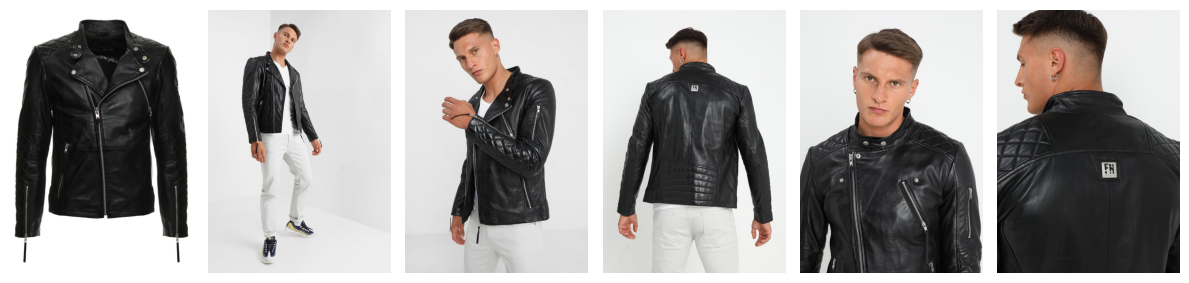

Shop2:


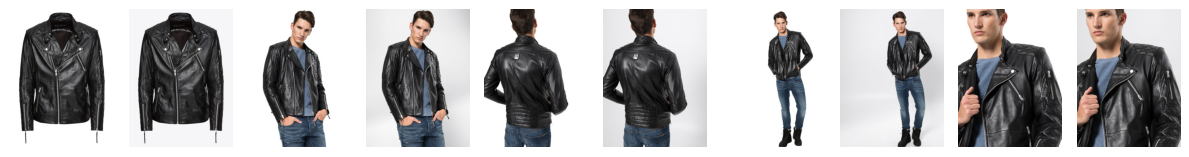

In [32]:
#Randomly matching images to verify the matches
r=rd.randint(0,len(matches_df)) #Randomly generating index numbers of matches
print ("Shop1:" )
plotting_images(offers_test_df[offers_test_df['title']==matches_df.loc[r][0]].iloc[0]) #Plotting the first product's images
print ("Shop2:" )
plotting_images(offers_test_df[offers_test_df['title']==matches_df.loc[r][2]].iloc[0]) #Plotting the second product's images